# Naive Bayes: Three Examples

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian Example: 
Let's use price per square foot and elevation to predict whether to predict whether a house is in SF or NY. 

In [2]:
data = pd.read_csv('data/ny_sf_apt.csv')

In [3]:
data.in_sf.value_counts()

1    268
0    224
Name: in_sf, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


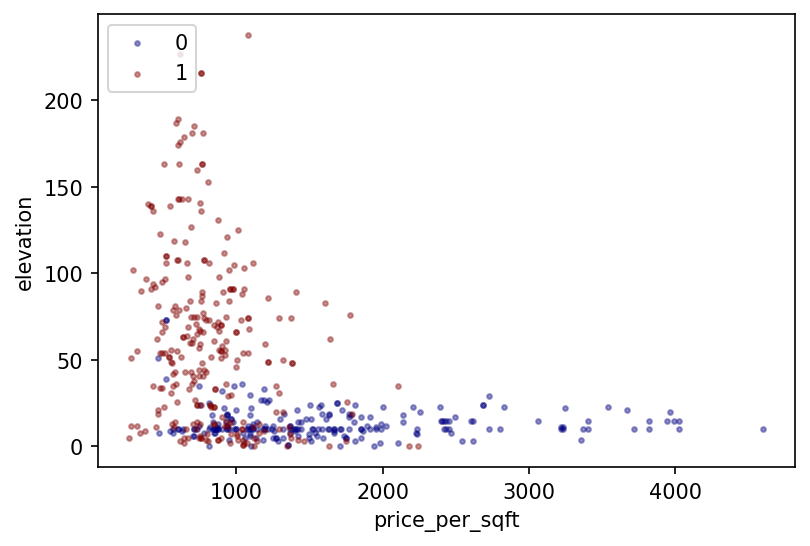

In [4]:
def scatter_plot_data(data):
    plt.figure(dpi=150)
    for ix, label in enumerate([0, 1]):
        new_data = data[data['in_sf']==ix]
        plt.scatter(new_data['price_per_sqft'], new_data['elevation'],c=plt.cm.jet(ix/0.5), alpha=0.4, label=label, s=5)
    plt.ylabel("elevation")
    plt.xlabel("price_per_sqft")
    plt.legend(loc="upper left");

scatter_plot_data(data)

In [5]:
X = data[['price_per_sqft', 'elevation']]
y = data.iloc[:,0]
X.head()

,price_per_sqft,elevation
0,999,10
1,1939,0
2,628,9
3,1258,9
4,878,10


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8243243243243243

In [8]:
nb.theta_ # mean of each feature by class

array([[1683.50322581,   13.92903226],
       [ 865.23280423,   61.51322751]])

In [9]:
np.sqrt(nb.sigma_) # variance of each feature by class

array([[871.21961543,   9.87741239],
       [336.66716851,  51.53266415]])

In [10]:
X.head()

,price_per_sqft,elevation
0,999,10
1,1939,0
2,628,9
3,1258,9
4,878,10


In [11]:
def make_meshgrid(x, y, h=1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 300, x.max() + 300
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


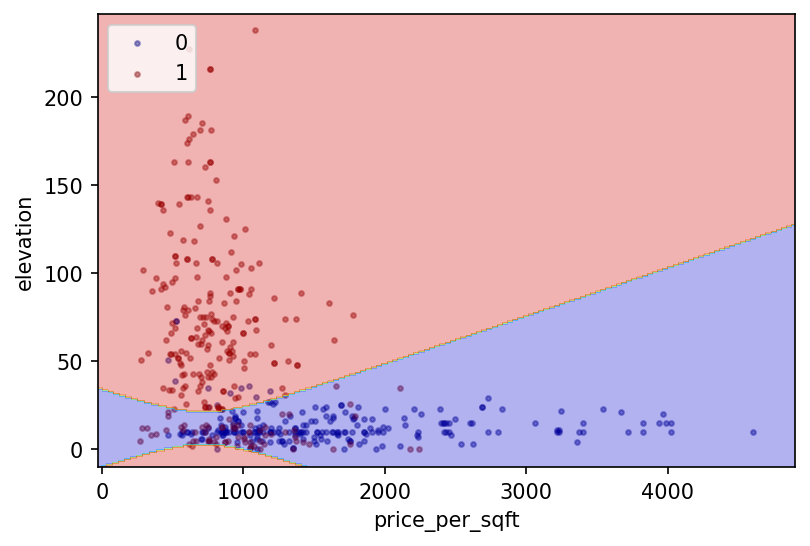

In [12]:
scatter_plot_data(data)
ax = plt.gca()
plot_contours(ax, nb, X.to_numpy(), y.to_numpy(), cmap=plt.cm.jet, alpha=0.3);

## Bernoulli Example: Now let's try votes!

In [13]:
def generate_congress_data(num_congressmen=100):
    votes = [0,1]
    senators = np.random.choice(votes, replace=True, size=(num_congressmen,4))
    df = pd.DataFrame(senators, columns=['vote1','vote2','vote3','vote4'])
    
    def calculate_party(row):
        x = row['vote1']
        y = row['vote2']
        z = row['vote3']

        party = 0.7*x + 0.5*y - z + np.random.normal(0,0.3)
        if party > 0.1:
            return 'Dem'
        elif party > 0.01:
            return 'Ind'
        else:
            return 'Rep'
    
    df['party'] = df.apply(calculate_party,axis=1)
    print(df.party.value_counts())
    return df.iloc[:,:-1],df.iloc[:,-1]

X, y = generate_congress_data(num_congressmen=400)

Rep    198
Dem    186
Ind     16
Name: party, dtype: int64


In [14]:
X.head()

,vote1,vote2,vote3,vote4
0,0,0,0,1
1,1,1,0,1
2,1,1,0,0
3,1,1,0,0
4,0,1,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8083333333333333

In [17]:
dc = DummyClassifier() # not for real problems, just a baseline 
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

/opt/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.4666666666666667

## Multinomial example: Predicting what a document is about

In [28]:
from sklearn import datasets

categories = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
ng_train = datasets.fetch_20newsgroups(subset='train', 
                                       categories=categories, 
                                       remove=('headers', 
                                               'footers', 'quotes'))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(ng_train.data, ng_train.target, test_size=0.3, random_state=42)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [31]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9458917835671342

In [51]:
new_data = ng_train.data[0]
print(new_data)




I happen to be a big fan of Jayson Stark.  He is a baseball writer for the 
Philadelphia Inquirer.  Every tuesday he writes a "Week in Review" column.  
He writes about unusual situations that occured during the week.  Unusual
stats.  He has a section called "Kinerisms of the Week" which are stupid
lines by Mets brodcaster Ralph Kiner.  Every year he has the LGTGAH contest.
That stands for "Last guy to get a hit."  He also writes for Baseball 
America.  That column is sort of a highlights of "Week in Review."  If you 
can, check his column out sometime.  He might make you laugh.

Rob Koffler



In [52]:
new_X = count_vectorizer.transform([new_data])

In [53]:
nb.predict(new_X)

array([2])